<a href="https://colab.research.google.com/github/nitinpatil301a/Deep-learning-youtube/blob/master/Image_classification_using_VGG16_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%tensorflow_version 2.0.0
import tensorflow as tf
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [9]:
cd /content/drive/My Drive/cat_dog_dataset_zip

/content/drive/My Drive/cat_dog_dataset_zip


In [0]:
#!unzip validation.zip

In [0]:
#!unzip train.zip


In [0]:
train_data_dir="/content/drive/My Drive/cat_dog_dataset_zip/train"
validation_data_dir="/content/drive/My Drive/cat_dog_dataset_zip/validation"
img_width=50
img_height=50
batch_size=500

In [13]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size = (img_width, img_height),
                                              classes=['cat','dog'],
                                              class_mode = 'binary',
                                              batch_size=batch_size)

validation_generator = datagen.flow_from_directory(directory=validation_data_dir,
                                              target_size = (img_width, img_height),
                                              classes=['cat','dog'],
                                              class_mode = 'binary',
                                              batch_size=batch_size)

Found 24962 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [14]:
vgg_arch=VGG16(input_shape=(img_width,img_height,3),weights="imagenet",include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
for layers in vgg_arch.layers:
  layers.trainable=False

In [0]:
model=Sequential()
model.add(vgg_arch)
model.add(Flatten())
model.add(Dense(128,activation='relu',))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 14,780,993
Trainable params: 66,049
Non-trainable params: 14,714,944
_______________________________________

In [0]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [21]:
history=model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 10, 
                              validation_data=validation_generator, validation_steps=len(validation_generator)
                              , verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
50/50 [==============================] - 669s 13s/step - loss: 0.6078 - accuracy: 0.6884 - val_loss: 0.5221 - val_accuracy: 0.7105
Epoch 2/10
50/50 [==============================] - 681s 14s/step - loss: 0.5186 - accuracy: 0.7424 - val_loss: 0.5263 - val_accuracy: 0.7632
Epoch 3/10
50/50 [==============================] - 672s 13s/step - loss: 0.4888 - accuracy: 0.7592 - val_loss: 0.5145 - val_accuracy: 0.7895
Epoch 4/10
50/50 [==============================] - 667s 13s/step - loss: 0.4729 - accuracy: 0.7698 - val_loss: 0.4969 - val_accuracy: 0.7895
Epoch 5/10
50/50 [==============================] - 665s 13s/step - loss: 0.4634 - accuracy: 0.7741 - val_loss: 0.4728 - val_accuracy: 0.7895
Epoch 6/10
50/50 [==============================] - 663s 13s/step - loss: 0.4547 - accuracy: 0.7779 - val_loss: 0.4883 - val_accuracy: 0.7368
Epoch 7/10
50/50 [==============================] - 665s 13s/step - loss

In [0]:
from tensorflow.keras.preprocessing import image

array([0])

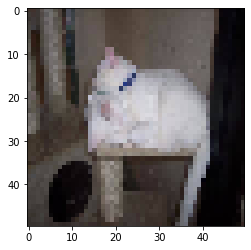

In [23]:
img=image.load_img("/content/drive/My Drive/cat_dog_dataset_zip/validation/cat/cat.12481.jpg",target_size=(img_width,img_height))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0
img = np.expand_dims(img, axis=0)
img_class = np.argmax(model.predict(img),axis=1)
img_class